In [1]:
from qwen2vl_count import  Qwen2VLForConditionalGenerationCount

from transformers import AutoTokenizer, AutoProcessor

from qwen_vl_utils import process_vision_info

model = Qwen2VLForConditionalGenerationCount.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
)

# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

tokenizer = processor.tokenizer

print('ori len', len(tokenizer))

COUNT_TOKEN_FORMAT="<c{count}/>"
NUM=30
count_tokens = [COUNT_TOKEN_FORMAT.format(count=i) for i in range(NUM + 1)]
print(count_tokens)
# num_new_tokens = tokenizer.add_tokens(count_tokens, special_tokens=True)

num_new_tokens = tokenizer.add_tokens(count_tokens)


print('new_tokens', num_new_tokens, len(tokenizer), model.model.embed_tokens.weight.shape)

token_ids = tokenizer.convert_tokens_to_ids(count_tokens)
print(token_ids)

model.config.count_token_ids = token_ids

# model.resize_token_embeddings(len(tokenizer))

# print("resized_embed", model.model.embed_tokens.weight.shape)

save_dir = f'/home/tixiong/storage/checkpoints/Qwen2-VL-2B-Instruct-Count-SpecialToken-NUM{NUM}'

model.save_pretrained(save_dir)
processor.save_pretrained(save_dir)
print(model.config)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


ori len 151657
['<c0/>', '<c1/>', '<c2/>', '<c3/>', '<c4/>', '<c5/>', '<c6/>', '<c7/>', '<c8/>', '<c9/>', '<c10/>', '<c11/>', '<c12/>', '<c13/>', '<c14/>', '<c15/>', '<c16/>', '<c17/>', '<c18/>', '<c19/>', '<c20/>', '<c21/>', '<c22/>', '<c23/>', '<c24/>', '<c25/>', '<c26/>', '<c27/>', '<c28/>', '<c29/>', '<c30/>']
new_tokens 31 151688 torch.Size([151936, 1536])
[151657, 151658, 151659, 151660, 151661, 151662, 151663, 151664, 151665, 151666, 151667, 151668, 151669, 151670, 151671, 151672, 151673, 151674, 151675, 151676, 151677, 151678, 151679, 151680, 151681, 151682, 151683, 151684, 151685, 151686, 151687]
[2025-04-17 23:28:00,849] [WARNING] [real_accelerator.py:174:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.
[2025-04-17 23:28:00,851] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cpu (auto detect)
Qwen2VLConfig {
  "_name_or_path": "Qwen/Qwen2-VL-2B-Instruct",
  "architectures": [
    "Qwen2

In [2]:
# in_str = "<think> testst . <answer><c9/></answer>"
# inputs = tokenizer(in_str, return_tensors='pt')
# print(inputs, tokenizer.batch_decode(inputs.input_ids.reshape(-1,1)))

from qwen2vl_count import  Qwen2VLForConditionalGenerationCount

from transformers import AutoTokenizer, AutoProcessor

from qwen_vl_utils import process_vision_info

save_dir= "/home/tixiong/storage/checkpoints/Qwen2-VL-2B-Instruct-Count-SpecialToken-NUM30"
model = Qwen2VLForConditionalGenerationCount.from_pretrained(
   save_dir, torch_dtype="auto", device_map="auto"
)

# default processer
processor = AutoProcessor.from_pretrained(save_dir)

tokenizer = processor.tokenizer

print('ori len', len(tokenizer))

print(model)
print(model.config)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


ori len 151688
Qwen2VLForConditionalGenerationCount(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=Tr

In [4]:
gpt_response = '''<think>\nThe question asks to count the number of single letter days of the week shown in the image.\nThe letters that represent the days of the week are S, M, T, W, F. We need to count how many of these appear in the image.\nLet's examine each calendar in the image.\n1. The first calendar (January 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.\n2. The second calendar (January 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.\n3. The third calendar fragment has days S, M. This gives us 2 letters.\n4. The fourth calendar (August 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.\n5. The fifth calendar (September 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.\n\nSo in total we have 7 + 7 + 2 + 7 + 7 = 30 letters.\n\n</think>\n<answer>30</answer>'''
response_splits = gpt_response.split('<answer>')
final_answer = response_splits[1].split("</answer>")[0]
new_gpt_response = f"{response_splits[0]}<answer><c{final_answer}/></answer>"

print(new_gpt_response)

print(tokenizer(new_gpt_response, return_tensors='pt'))
print(tokenizer.batch_decode(tokenizer(new_gpt_response, return_tensors='pt').input_ids[:,-10:].reshape(-1, 1), skip_special_token=True))

<think>
The question asks to count the number of single letter days of the week shown in the image.
The letters that represent the days of the week are S, M, T, W, F. We need to count how many of these appear in the image.
Let's examine each calendar in the image.
1. The first calendar (January 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.
2. The second calendar (January 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.
3. The third calendar fragment has days S, M. This gives us 2 letters.
4. The fourth calendar (August 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.
5. The fifth calendar (September 2023) has days S, M, T, W, T, F, S. This gives us 7 letters.

So in total we have 7 + 7 + 2 + 7 + 7 = 30 letters.

</think>
<answer><c30/></answer>
{'input_ids': tensor([[ 13708,    766,    397,    785,   3405,  17064,    311,   1760,    279,
           1372,    315,   3175,   6524,   2849,    315,    279,   2003,   6839,
            304,    279,   216

In [18]:
import torch
import torch.nn as nn

# Example of target with class indices
loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()
# Example of target with class probabilities

import torch
import random
import numpy as np

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed(42)

# torch.random.seed = 42
input_tensor = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
target = torch.randn(3, 5)
output = loss(input_tensor, target)
output.backward()
print(input_tensor, target)

in_softmax = nn.functional.softmax(input_tensor, dim=-1)
print(torch.mean((-torch.log(in_softmax) * target).sum(dim=-1)))
print(torch.mean(-torch.log(in_softmax) * nn.functional.softmax(target, dim=-1)))

print("output", output)

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229],
        [-0.1863,  2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]], requires_grad=True) tensor([[ 0.9580,  1.3221,  0.8172, -0.7658, -0.7506],
        [ 1.3525,  0.6863, -0.3278,  0.7950,  0.2815],
        [ 0.0562,  0.5227, -0.2384, -0.0499,  0.5263]])
tensor(2.8397, grad_fn=<MeanBackward0>)
tensor(0.3844, grad_fn=<MeanBackward0>)
output tensor(2.8397, grad_fn=<DivBackward1>)


In [20]:
import re

def extract_number_answer(output_str):
    # Try to find the number within <answer> tags, if can not find, return None
    answer_pattern = r'<answer>\s*(\d+)\s*</answer>'
    match = re.search(answer_pattern, output_str)
    
    if match:
        return int(match.group(1))

    answer_pattern2 = r'<answer>\s*<c(\d+)/>\s*</answer>'
    match2 = re.search(answer_pattern2, output_str)
    
    if match2:
        return int(match2.group(1))

    return None

print(extract_number_answer("<answer><c35/></answer>"))

35


In [6]:
import re

content = """<think>\nThe question asks for the number of stairs in the fourth from top image.\nThe fourth from top image is a floor plan of the house.\nI need to count the number of stairs in the floor plan.\nThe stairs are located in the upper right corner of the floor plan.\nI can see the stairs in the floor plan.\nI can count 10 stairs in the floor plan.\n</think>\n<answer><c10/></answer>"""

def format_reward(content, alpha=1.0, **kwargs):
    """Reward function that checks if the completion has a specific format."""
    pattern = r"<think>.*?</think>\s*<answer>.*?</answer>"
    match = re.fullmatch(pattern, content, re.DOTALL)
    return 1.0 * alpha if match else 0.0

print(format_reward(content))

1.0


In [10]:
import re
from math_verify import parse

content = """<think>\nThe question asks for the number of stairs in the fourth from top image.\nThe fourth from top image is a floor plan of the house.\nI need to count the number of stairs in the floor plan.\nThe stairs are located in the upper right corner of the floor plan.\nI can see the stairs in the floor plan.\nI can count 10 stairs in the floor plan.\n</think>\n<answer><c10/></answer>"""
print(parse(content))
content = re.sub(r"<c(\d+)/>", r" \1 ", content)
print(content)

[10, '10']
<think>
The question asks for the number of stairs in the fourth from top image.
The fourth from top image is a floor plan of the house.
I need to count the number of stairs in the floor plan.
The stairs are located in the upper right corner of the floor plan.
I can see the stairs in the floor plan.
I can count 10 stairs in the floor plan.
</think>
<answer> 10 </answer>


In [4]:
from transformers import AutoTokenizer, AutoProcessor

from qwen_vl_utils import process_vision_info


# model = Qwen2VLForConditionalGenerationCount.from_pretrained(
#     "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
# )

# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct")

inputs = processor(text = "<1> <2> <3> <100>", return_tensors='pt')
print(inputs)
print(processor.batch_decode(inputs.input_ids.reshape(-1, 1)))



{'input_ids': tensor([[ 27,  16,  29, 366,  17,  29, 366,  18,  29, 366,  16,  15,  15,  29]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
['<', '1', '>', ' <', '2', '>', ' <', '3', '>', ' <', '1', '0', '0', '>']


In [8]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor

from transformers import AutoTokenizer, AutoProcessor

from qwen_vl_utils import process_vision_info

model_name = "Qwen/Qwen2.5-VL-3B-Instruct"
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    model_name, torch_dtype="auto", device_map="auto"
)

# # default processer
processor = AutoProcessor.from_pretrained(model_name)

tokenizer = processor.tokenizer

print('ori len', len(tokenizer))

# COUNT_TOKEN_FORMAT="<{count}>"
# NUM=100
# count_tokens = [COUNT_TOKEN_FORMAT.format(count=i) for i in range(NUM + 1)]
# print(count_tokens)
# # num_new_tokens = tokenizer.add_tokens(count_tokens, special_tokens=True)

# num_new_tokens = tokenizer.add_tokens(count_tokens)


# print('new_tokens', num_new_tokens, len(tokenizer), model.model.embed_tokens.weight.shape)

# token_ids = tokenizer.convert_tokens_to_ids(count_tokens)
# print(token_ids)

# model.config.count_token_ids = token_ids

model.resize_token_embeddings(len(tokenizer))

# # print("resized_embed", model.model.embed_tokens.weight.shape)

# save_dir = f'/home/tixiong/storage/checkpoints/{model_name}-Count-SpecialToken-NUM{NUM}'

# model.save_pretrained(save_dir)
# processor.save_pretrained(save_dir)
# print(model.config)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

ori len 151665


0.2 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.5 [1.    0.135 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
0.7 [1.    0.36  0.017 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
1.0 [1.    0.607 0.135 0.011 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
2.0 [1.    0.882 0.607 0.325 0.135 0.044 0.011 0.002 0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


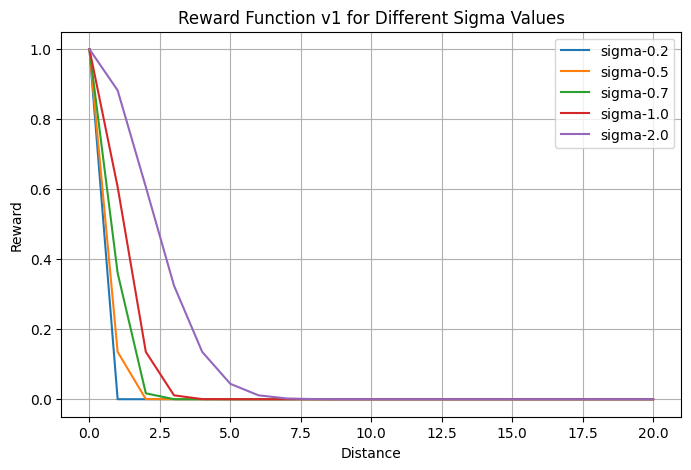

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def reward_func_v1_np(dist, sigma=0.5):
    return np.exp(-np.square(dist) / (2 * sigma ** 2))

dist_values = np.linspace(0, 20, 21)
sigmas = [0.2, 0.5, 0.7, 1.0, 2.0]

plt.figure(figsize=(8, 5))
for sigma in sigmas:
    reward_values = reward_func_v1_np(dist_values, sigma=sigma)
    print(sigma, np.round(reward_values, decimals=3))
    plt.plot(dist_values, reward_values, label=f'sigma={sigma}')

plt.title('Reward Function v1 for Different Sigma Values')
plt.xlabel('Distance')
plt.ylabel('Reward')
plt.legend([f'sigma-{s}' for s in sigmas])
plt.grid(True)